In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('musteriler.csv')   # Hacim sütunu: iş hacmi
data.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [25]:
x = data.iloc[:, 3:].values
x

array([[ 69900,   6325],
       [ 79000,   5200],
       [ 85500,   7825],
       [ 17100,   8375],
       [  5500,   5450],
       [ 27200,   8550],
       [ 20500,   4500],
       [ 69000,   5050],
       [ 13200,   8325],
       [ 31800,   5975],
       [ 59200,   5700],
       [ 95800,   6475],
       [ 46200,   3850],
       [ 29800,   4100],
       [ 83000,   8125],
       [143500,   8650],
       [ 91300,   5125],
       [  9800,   3950],
       [ 79500,   5325],
       [ 66400,   5775],
       [ 25900,   3400],
       [     0,   7075],
       [ 90900,   5725],
       [ 51800,   4300],
       [126800,   7500],
       [ 40800,   5000],
       [ 26400,   5325],
       [ 76100,   5350],
       [ 26500,   2600],
       [ 37200,   6250],
       [  4000,   3075],
       [ 34500,   4875],
       [ 47100,   5525],
       [ 95600,   7225],
       [ 35400,   5275],
       [ 41100,   6050],
       [ 46400,   3425],
       [ 10400,   4600],
       [ 50100,   4575],
       [111300,   8525],


In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [27]:
kmeans.cluster_centers_     # Başlangıç Merkez Noktaları. İlk sütun Hacimin merkez noktaları, İkinci sütun  maaşın merkez noktaları

array([[ 22069.41176471,   5320.88235294],
       [104386.95652174,   7289.13043478],
       [ 58643.47826087,   5844.92753623]])

In [28]:
results = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(x)
    results.append(kmeans.inertia_)    # inertia_: float (Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.)
                                       # inertia_ means WCSS

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


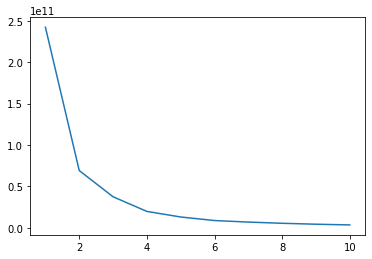

In [29]:
plt.plot(range(1, 11), results)

# Agglomerative Clustering / Hierarchical Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_pred = ac.fit_predict(x)
y_pred

array([0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1,
       2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 2,
       2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1,
       1, 1], dtype=int64)

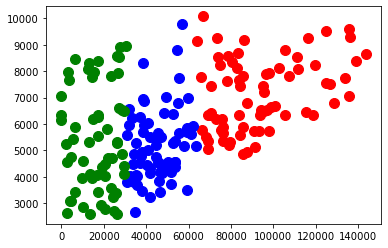

In [32]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'red')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'blue')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'green')